<a href="https://colab.research.google.com/github/Igor-Savchenko/FS_Test_task_2/blob/master/FS_test_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 2.** Напишите, какие вы знаете способы борьбы с несбалансированными классами и почему с ними нужно бороться, какие метрики вы будете использовать при оценке результатов. На примере датасета https://www.kaggle.com/mlg-ulb/creditcardfraud продемонстрируйте, как применять описанные вами методы и как они сказываются на результатах работы алгоритмов классификации.

**Намек на способ решения.** На самом деле это не сложные задания и весь материал для их выполнения есть на поверхности в интернете.

**Что такое несбалансированные классы, и почему с ними нужно бороться.**

Насколько я понял, речь идет всё-таки о несбалансированных выборках (наборах данных). **Несбалансированным набором данных (Imbalanced data)** - называется такой набор классифицируемых данных в которыом присутствует существенный дисбаланс в количестве элементов принадлежащих разным классам. Далее все рассуждения будут для случая двухклассовой классификации, они могут быть масштабированы на случай многоклассовой классификации, но рассуждение о проблеме в общем виде сильно увеличит обьем пояснений, и усложнит понимание. 
Согласно https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data, классы, элементы которых составляют большую часть набора данных, принято называть мажоритарными, а элементы которых составляют меньшую часть, миноритарными. Степень несбалансированности набора данных предлагается оценивать следующим обрзом: малая 20-40%, средняя 1-20%, высокая <1% данных в миноритарном классе. В сильно несбалансированных выборках классификаторы могут настраиватся на объекты мажоритарного класса (когда высокую точность классификатора можно получить, не выделяя объекты миноритарного класса), в то время как во многих задачах, включая задачу обнаружения мошеннических транзакций, интерес представляют объекты миноритарного класса (мошеннические транзакции).

Загрузим предложенный датасет  https://www.kaggle.com/mlg-ulb/creditcardfraud и попробуем понять какие данные в нем содержаться, и почему они несбалансированны.

In [0]:
# Для экономии времени на настройке окружения и установке пакетов
# настоящий блокнот создавался в https://colab.research.google.com/

# Прошу прощения за комментарии на русском, но посколку это тестовая задачка
# и не подразумевает поддержки, я позволил себе писать их именно так, я быстрее 
# формулирую мысли именно на русском, к тому же текстовая часть блокнота тоже 
# написана на этом языке. Учитывая географическое положение компании, искренне 
# надеюсь что у проверяющего не возникнет трудностей при проверке.

# Подключим colab к drive.Google 
# Так чуть медленнее чем коннектится к Kaggle, но гораздо меньше писать
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Поместим данные в датафрейм, и посмотрим на них 
import pandas as pd 

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# На всякий случай посмотрим общую статистику
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
# Проверим есть ли пустые значеия
df.isnull().sum().max()

0

In [0]:
# А теперь посмотрим насколько сбалансирована наша выборка, посчитаем сколько элементов в каждом классе в %

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

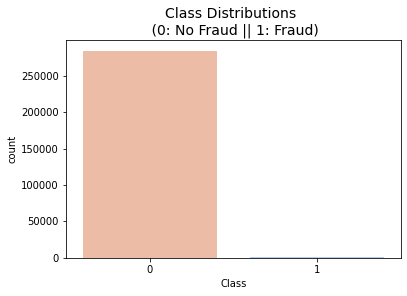

In [0]:
# Проиллюстрируем распределение
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot('Class', data=df, palette="coolwarm_r")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


**Метрики качества моделей**

Прежде чем начать обсуждать способы борьбы с несбалансированными классами, нужно разобраться с критериями оценки успешности этой борьбы. В машинном обучении, для такой задачи, преинято использовать некоторые стандартные метрики. Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок). В нашем случае двухклассовой классификации  матрица ошибок будет выглядеть следующим образом:

$$\hat y / y$$| $$y=1$$             | $$y=0$$ 
--------------|---------------------|----------------------
$$\hat y = 1$$| True Positive (TP)  | False Positive (FP)
$$\hat y = 0$$| False Negative (FP) | True Negative (FN)

Здесь $\hat y$  — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте.
Таким образом, ошибки классификации бывают двух видов: ложно отрицательные (FN) и ложно положительные (FP).Наиболее понятной метрикой качества модели является точность - доля правильных ответов алгоритма:

$$accuracy = {{TP+TN}\over{TP+TN+FP+FN}}$$

Именна эта метрика беспалезна в случае несбалансированных классов. Попробуем посмотреть насколько хорошо accuracy подходит для характеризации нашего набора данных. Посчитаем эту метрику сначала для случая кода наш классификатор разметил все данные меткой мажоритарного класса, и увидим что существенного улучшения выбранной метрики добиться уже не получится, она и так близка еденице (~0.9982725143693799). Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).

$$precision={TP\over{TP+FP}}$$

$$recall={TP\over{TP+FN}}$$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок. Часто в реальной практике стоит задача найти оптимальный баланс между этими двумя метриками. Обычно при оптимизации гиперпараметров алгоритма используется одна метрика, улучшение которой мы и ожидаем увидеть на тестовой выборке. Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. Например F-мера (в общем случае ) $F_\beta$— среднее гармоническое precision и recall:

$$ F_\beta = (1+\beta^2) \cdot{{precision \cdot recall}\over{\beta^2\cdot precision+recall}}$$

$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае $precision = 1$ и $recall = 1%$ иметь $F1 = 1$). F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю. Попробуем обучить простейший классификатор на основе логистической регрессии на ншем наборе данных и посчитать описанные метрики для него. Посмотрим насколько он лучше классификатора который будет доверять всем транзакциям.

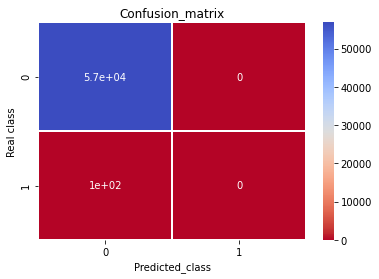

accuracy = 0.9981742214107651
precision = 0.0
recall = 0.0
f1 = 0.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# Формируем тестовое и тренировочное множества
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Посмотрим насколько хорошо работает классификатор который довеяет всем транзакциям
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# Поскольку в этом задании нам придется достаточно часто смотреть на метрики 
# тестируемой модели имеет смысл поместить код для вывода метрик в отдельную 
# функцию
def display_simple_metrics(y_test, y_pred):
  '''
  Display confusion matrix as heatmap, print accuracy_score, precision_score, 
  recall_score, and f1_score
  '''
  # Покажем матрицу ошибок
  sns.heatmap(confusion_matrix(y_test, y_pred), 
              cmap="coolwarm_r", 
              annot=True, 
              linewidths=0.5)
  plt.title("Confusion_matrix")
  plt.xlabel("Predicted_class")
  plt.ylabel("Real class")
  plt.show()
  # Выведем значения основных метрик
  print('accuracy =', accuracy_score(y_test, y_pred))
  print('precision =', precision_score(y_test, y_pred, zero_division=0))
  print('recall =', recall_score(y_test, y_pred, zero_division=0))
  print('f1 =', f1_score(y_test, y_pred))
  return None

# Вызовем функцию display_simple_metrics()  
display_simple_metrics(y_test, dummy_pred)

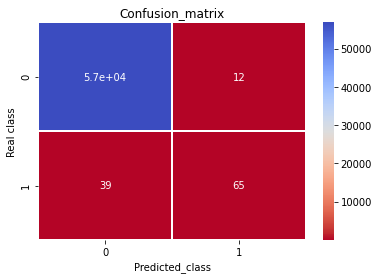

accuracy = 0.9991046662687406
precision = 0.8441558441558441
recall = 0.625
f1 = 0.7182320441988951


In [0]:
# Теперь научим логистическую регрессию, и сравним ее результаты с результатами предыдущего алгоритма
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pred_0 = lr.predict(X_test)

display_simple_metrics(y_test, lr_pred_0)

Видно что метрика accuracy слабо изменилась после смены классификатора, а вот остальные метрики оказались гораздо более чувствительны.

**Способы борьбы с несбалансированными данными.** 

Рассмотрение задачи именно с точки зрения борьбы с несбалансированноми данными приводит нас к методам изменения набора данных таким образом, чтобы получившийся набор оказался более сбалансированным. Эти методы иногда называют общим термином сэмплирование, это и under-sampling, исключение из выборки части наблюдений мажоритарного класса, и over-sampling, добавление в выборку наблюдений миноритарного класса, например используя бутстрапирование или алгоритмы гененерации новых данных (SMOTE), и методы семплирования с весами, возможны и комбинированные подходы. 

С другой стороны, более интересным представляется рассмотрение проблемы нахождения качественного решения задачи классификации имея несбалансированный набор данных. Во-первых, такая формулировка задачи представляется более правильной, сами по себе несбалансированные данные являются нормальным явлением, а не каким то негативным случаем, более подробные рассуждения на этот счет имеются например здесь: https://habr.com/ru/post/349078/. Во-вторых, в таком контексте,появляется широкий спектр возможностей связанный не только с балансировкой датасета, но и возможность подбора модели и ее параметров. Поверхностный поиск в google, быстренько выдает несколько подборок решений проблем с несбалансированными классами. Например:

Название | Источник
---------|----------
8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset | https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
7 Techniques to Handle Imbalanced Data| https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
How to Handle Imbalanced Classes in Machine Learning | https://elitedatascience.com/imbalanced-classes
5 IMPORTANT TECHNIQUES TO PROCESS IMBALANCED DATA IN MACHINE LEARNING | https://analyticsindiamag.com/5-important-techniques-to-process-imbalanced-data-in-machine-learning/

Интегрируя написанное в источниках выше можно сформировать список методов которые могут помочь в задачах с несбалансированными наборами данных:

**Изменение первоначальной выборки:**
1. Уменьшение выборки 
  1. Случайная подвыборка элементов мажоритарного класса
  2. Выделение наиболее интересного подкласса после исследовательского анализа данных
  3. Выбор пар элементов разных класов с близкими значениями признаков (близко лежащих в векторном пространстве признаков) 
2. Увеличение выборки
  1. Бутстрапирование элементов миноритарного класса
  2. Генерация новых (синтетических) элементов миноритарного класса, например используя алгоритмы SMOTE, ROSE
  3. Сбор большего количества данных, например за счет расширения каких то интервалов, временных промежутков, географических областей, использование других источников данных 

**Измеенение модели, ее параметров или процесса обучения:**

1. Выбор правильной метрики оценки качества модели, нечувствительной к дисбалансу в наборе данных, например f-меры или precision.
2. Подбор алгоритма классификации не чувствительного к дисбалансу данных
3. Подбор гиперпараметров модели 
4. Подбор алгоритма обучения
  1. Подбор параметров алгоритма 
  2. Использование кроссвалидации
  3. Выбор размера батча, алгоритмов формирования батча
  4. Использование чувствительных к затратам техник обучения (Cost-Sensitive Learning Technique)

Все вышеописанные способы могут комбинироваться между собой произвольным образом, и именно совместное их использование, часто, дает наилучший результат.


Продемонстрировать, в полной мере, применение всех описанных мной выше подходов, представляется сложной и весьма обьемной задачей. Поэтому, ниже будут продемонстрированы исключительно простые методы борьбы с дисбалансом классов, поскольку именно о них был изначальный вопрос.

**1. Случайная подвыборка элементов мажоритарного класса (Undersample majority сlass)**

Будем обучать логистическую регрессию с теми же гиперпараметрами на выборке сформированной с помощью андерсэмплинга, заданное соотношение классов 1:1.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

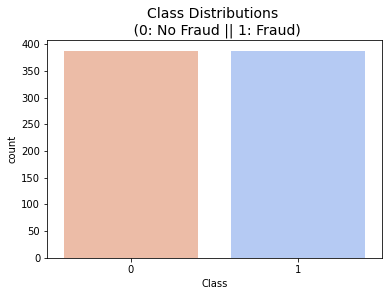

In [0]:
from sklearn.utils import resample

# Сформируем обучающую выборку
X_concat=pd.concat([X_train,y_train],axis=1)
not_fraud=X_concat[X_concat['Class']==0]
fraud=X_concat[X_concat['Class']==1]
not_fraud_downsampled = resample(not_fraud, replace = False, n_samples = len(fraud), random_state = 27) 
downsampled = pd.concat([not_fraud_downsampled, fraud])

sns.countplot('Class', data=downsampled, palette="coolwarm_r")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

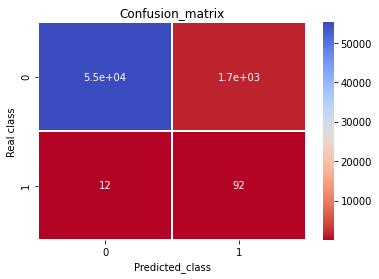

accuracy = 0.9699975422211299
precision = 0.05142537730575741
recall = 0.8846153846153846
f1 = 0.0972002113048072


In [0]:
# Поскольку мы будем пробовать методы ресэмплинга именно на логистической 
# регресси засунем повторяющийся код в функцию
def teach_logistic_regression(dataset, X_test):
  '''
  Function get train and X_test datasets, teach logistic regression classifier 
  and return trained model and prediction for y_test 
  '''
  # Разобьем тренировочную выборку
  y_train = dataset.Class
  X_train = dataset.drop('Class', axis=1)
  # Обучим регрессию
  lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
  lr_pred = lr.predict(X_test)
  return(lr, lr_pred)

lr_1, lr_pred_1=teach_logistic_regression(downsampled, X_test)
display_simple_metrics(y_test, lr_pred_1)

Получившаяся модель стала немного лучше выявлять случаи мошенничества, однако стала достаточно часто подозревать честные транзакции в мошенничестве. Метрика recall заметно увеличилась, f1 и precision существенно снизилась, и если присмотреться даже accuracy пострадала. В случае когда цена пропуска мошеннической транзакции гораздо выше цены ложного обнаружения, такая модель может оказаться лучше предыдущей. Но в целом нельзя назвать ее хорошей. Вообще, продемонстирированный подход, имеет смысл применять к очень большим выборкам, таким что получившаяся выборка будет достаточно большой для качественного обучения модели, и при этом время обучения сократится в разы (а то и на порядки) за счет сокращения выборки.

**2. Бутстрапирование элементов миноритарного класса (Oversample minority class)**

Все как в прошлом примере, модель, параметры, соотношение классов

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

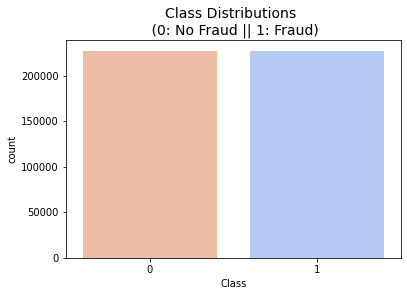

In [0]:
# Сформируем обучающую выборку 
X_concat=pd.concat([X_train,y_train],axis=1)
not_fraud=X_concat[X_concat['Class']==0]
fraud=X_concat[X_concat['Class']==1]
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=27)  
upsampled = pd.concat([not_fraud, fraud_upsampled])

sns.countplot('Class', data=upsampled, palette="coolwarm_r")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

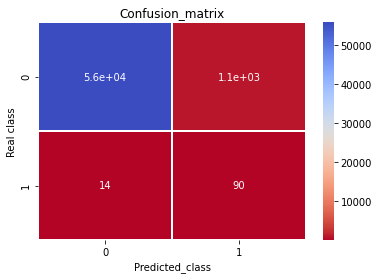

accuracy = 0.9810224360099715
precision = 0.07778738115816768
recall = 0.8653846153846154
f1 = 0.1427438540840603


In [0]:
lr_2, lr_pred_2=teach_logistic_regression(upsampled, X_test)
display_simple_metrics(y_test, lr_pred_2)

Результат очень похож на предыдущщий, ложных подозрений почти в 1.5 раза меньше, но все равно на порядок больше количества истинных мошеннических транзакций. Продемонстрированный подход наиболее актуален в случае малого набора данных. Попробовать сбалансировать precision и recall как в случае oversampling так и undersampling можно попробовать варьируя соотношение классов. Попробуем 1:5.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

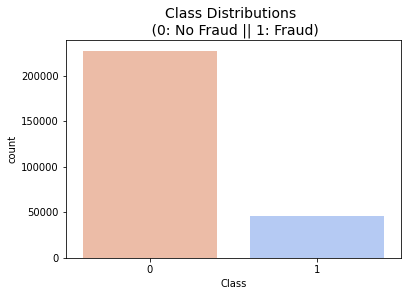

In [0]:
# Сформируем обучающую выборку 
X_concat=pd.concat([X_train,y_train],axis=1)
not_fraud=X_concat[X_concat['Class']==0]
fraud=X_concat[X_concat['Class']==1]
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud)//5, random_state=27) 
upsampled = pd.concat([not_fraud, fraud_upsampled])

sns.countplot('Class', data=upsampled, palette="coolwarm_r")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

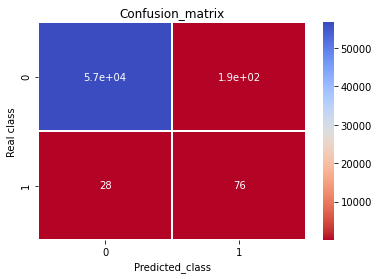

accuracy = 0.9961553316245918
precision = 0.2846441947565543
recall = 0.7307692307692307
f1 = 0.40970350404312667


In [0]:
lr_3, lr_pred_3=teach_logistic_regression(upsampled, X_test)
display_simple_metrics(y_test, lr_pred_3)

Видно что на таком множестве регрессия обучилась иначе, precision выросла по сравнению с предыдущим примером, recal снизилась f1-мера существенно подросла (Более чем вдвое). Теперь попробуем поправить дисбаланс классов создавая синтетические образцы.

**3. Генерация элементов миноритарного класса (SMOTE)**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

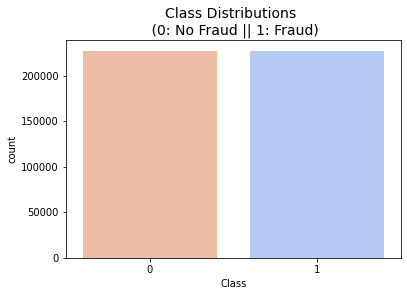

In [0]:
from imblearn.over_sampling import SMOTE

# Создадим сбалансированнцю выборку используяалгоритм SMOTE, баланс 1:1
sm = SMOTE(random_state=27, ratio=1.0)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

# Функция SMOTE.fit_sample() отдает датасет в виде двух массивов NdArray, 
# преобразуем их в pandas DataFrame чтобы применять заготовленные ранее куски 
# кода
X_sm=pd.DataFrame(X_sm, columns=X_train.columns)
y_sm=pd.Series(y_sm, name=y_train.name)
smote_dataset=pd.concat([X_sm, y_sm], axis=1)

sns.countplot('Class', data=smote_dataset, palette="coolwarm_r")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

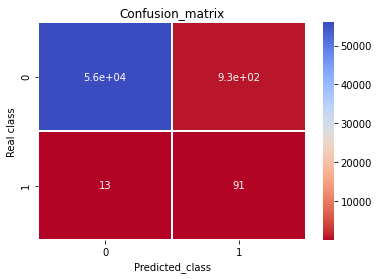

accuracy = 0.9834977704434535
precision = 0.0893909626719057
recall = 0.875
f1 = 0.1622103386809269


In [0]:
lr_4, lr_pred_4=teach_logistic_regression(smote_dataset, X_test)
display_simple_metrics(y_test, lr_pred_4)

Полученная с использованием метода SMOTE модель оказалась еще чуть лучше чем модель с оверсэмплингом. Количество ложно-позитивных срабтываний чуть уменьшилось, но порядок остался тем же. В целом балансирование классов в случае с нашим набором данных пока не привело к каким то революционным результатам, удалось увеличить recall за счет сильного снижения precision. Этого можно было добиться и более простыми способами. Можно конечно поиграть с комбинацией описанных методов, например применять одновременно и оверсэмплинг миноритарного класса и андерсэиплинг мажоритарного, или последовательно применить SMOTE и ROSE методы генерации синтетических образцов миноритарного класса. Существенно могло бы помочь увеличение количества наблюдений за счет дополнительных наборов данных. 

Для того чтобы продемонстрировать, что качество модели зависит не только от баланса классов, давайте обучим случайный лес на изначальном наборе данных с сильным дисбалансом классов.

**4. Применение Random Forest**

Выбор такого алгоритма не случаен, в приведенных выше источниках говориться о том что методы основанные на применении решающих деревьев и ансамблей не чувствительны к дисбалансу данных. В этом смысле случайный лес дважды не чувствителен. Давайте посмотрим насколько хорошо он работает.

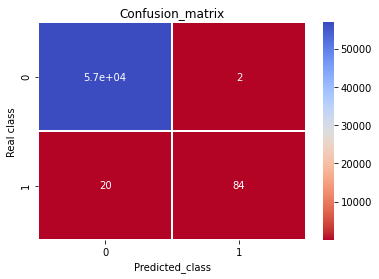

accuracy = 0.9996137776061234
precision = 0.9767441860465116
recall = 0.8076923076923077
f1 = 0.8842105263157894


In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=27).fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)

display_simple_metrics(y_test, rf_pred)

Для сравнения выведем результаты логистической регрессии обученной на том же наборе данных.

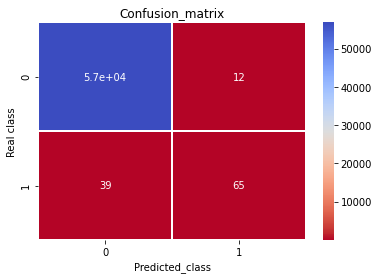

accuracy = 0.9991046662687406
precision = 0.8441558441558441
recall = 0.625
f1 = 0.7182320441988951


In [0]:
display_simple_metrics(y_test, lr_pred_0)

Видно что, применение метода случайного леса дает гораздо лучший результат, чем логистическая регрессия, и precision и recall гораздо выше, как следствие f1-мера тоже выше. Сведем в одну таблицу результаты всех обученных нами моделей, и попробуем выбрать наилучшую:

Param/Clf|Dummy|lr|lr_1|lr_2|lr_3|lr_4|rf_clf
---------|-----|----|----|----|----|----|---
accuracy|0.998|0.999|0.97|0.981|0.996|0.983|1
precision|0|0.844|0.051|0.078|0.285|0.089|0.977
recall|0|0.625|0.885|0.865|0.731|0.875|0.808
f1|0|0.718|0.097|0.143|0.41|0.162|0.884

Для выбора наилучшей модели, нам требуется определится какая метрика для нас важнее, это вопрос бизнес анализа, поскольку речь идет о мошеннических операциях предположу, что нам в первую очередь хотелось бы определять их максимально точно. То есть максимизировать recall, при этом отклонение законных транзакций тоже является нежелательным, то есть снижать precision не желательно.
В этой ситуации у нас есть два фаворита lr_1 обладает максимальным значением recall и низким precision, и rf_clf с recall немного ниже, но при этом высоким значением precision. На самом деле в любой обученной нами модели мы можем подправлять баланс precision-recall варьируя пороговое значение вероятности. Алгоритмы классификации прежде чем выдать номер класса к которому принадлежит конкретный образец, рассчитывают вероятность принадлежности образца к каждому классу, как правило это вещественное число от 0 до 1, далее если вероятность выше некоторого порогового значения (стандартно 0.5), относят образец к классу, если же ниже не относят. Таким образом если для нашего классификатора rf_clf мы снизим пороговое значение то параметр recall вырастет, а precision упадет, зависимость precision-recall не подчиняется какому то очевидному правилу. Рассмотрим еще пару метрик часто используемых при выборе моделей.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):

$$TPR={TP\over{TP+FN}}$$

$$FPR={FP\over{FP+TN}}$$

Кривая строится следующим образом, выбирается набор значений порога вероятности, для каждого порога рассчитывается TPR и FPR, которые наносятся на график и соединяются линиями с соседними точками. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1). Давайте построим такие кривые для наших моделей:

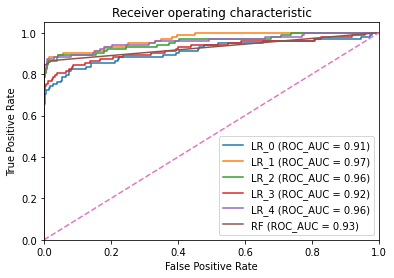

In [0]:
from sklearn.metrics import roc_curve, auc

fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, lr_1.predict_proba(X_test)[:,1])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, lr_2.predict_proba(X_test)[:,1])
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, lr_3.predict_proba(X_test)[:,1])
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, lr_4.predict_proba(X_test)[:,1])
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])

roc_auc_0= auc(fpr_0, tpr_0)
roc_auc_1= auc(fpr_1, tpr_1)
roc_auc_2= auc(fpr_2, tpr_2)
roc_auc_3= auc(fpr_3, tpr_3)
roc_auc_4= auc(fpr_4, tpr_4)
roc_auc_5= auc(fpr_5, tpr_5)

plt.figure()

plt.plot(fpr_0, tpr_0, label='LR_0 (ROC_AUC = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, label='LR_1 (ROC_AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, label='LR_2 (ROC_AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, label='LR_3 (ROC_AUC = %0.2f)' % roc_auc_3)
plt.plot(fpr_4, tpr_4, label='LR_4 (ROC_AUC = %0.2f)' % roc_auc_4)
plt.plot(fpr_5, tpr_5, label='RF (ROC_AUC = %0.2f)' % roc_auc_5)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Значения критерия AUC-ROC близки для всех обученных нами моделей, и максимальны для моделей в которых мы использовали ресэмплинг добиваясь соотношения классов 1:1.

Критерий AUC-ROC считается устойчивым к несбалансированным классам, но тут есть ньюансы.  AUC-ROC измеряет долю False Positive относительно True Negative и в задачах с сильным дисбалансом классов, где нам не так важен второй (больший) класс, может давать не совсем адекватную картину при сравнении алгоритмов (https://habr.com/ru/company/ods/blog/328372/). В этой ситуации используя тот же алгоритм лучше построить кривую в координатах precision-recall и посчитать площадь под ней. Сделаем это для наших моделей.

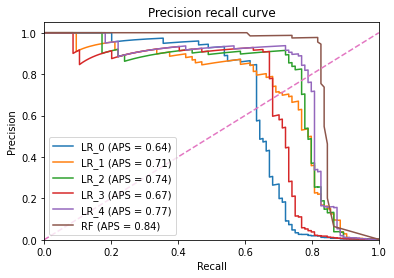

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision_0, recall_0, thresholds_0 = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, lr_1.predict_proba(X_test)[:,1])
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, lr_2.predict_proba(X_test)[:,1])
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, lr_3.predict_proba(X_test)[:,1])
precision_4, recall_4, thresholds_4 = precision_recall_curve(y_test, lr_4.predict_proba(X_test)[:,1])
precision_5, recall_5, thresholds_5 = precision_recall_curve(y_test, rf_clf.predict_proba(X_test)[:,1])

avg_prec_score_0= average_precision_score(y_test, lr.predict_proba(X_test)[:,1])
avg_prec_score_1= average_precision_score(y_test, lr_1.predict_proba(X_test)[:,1])
avg_prec_score_2= average_precision_score(y_test, lr_2.predict_proba(X_test)[:,1])
avg_prec_score_3= average_precision_score(y_test, lr_3.predict_proba(X_test)[:,1])
avg_prec_score_4= average_precision_score(y_test, lr_4.predict_proba(X_test)[:,1])
avg_prec_score_5= average_precision_score(y_test, rf_clf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(recall_0, precision_0, label='LR_0 (APS = %0.2f)' % avg_prec_score_0)
plt.plot(recall_1, precision_1, label='LR_1 (APS = %0.2f)' % avg_prec_score_1)
plt.plot(recall_2, precision_2, label='LR_2 (APS = %0.2f)' % avg_prec_score_2)
plt.plot(recall_3, precision_3, label='LR_3 (APS = %0.2f)' % avg_prec_score_3)
plt.plot(recall_4, precision_4, label='LR_4 (APS = %0.2f)' % avg_prec_score_4)
plt.plot(recall_5, precision_5, label='RF (APS = %0.2f)' % avg_prec_score_5)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision recall curve')
plt.legend(loc="lower left")
plt.show()

По критерию AUC_PR и average_precision_score, что примерно тоже самое, фаворитом является классификатор rf_clf. Кроме того из этого рисунка видно, что подобрав нужным образом пороговое значение вероятности для этой модели, можно добиться значения precision близкого к 0.95 при recall чуть выше 0.8. А именно precision=0.945, recall=0.827, threshold=0.36. Или precision=0.463, recall=0.846, при threshold=0.04.

In [0]:
for i in range(len(precision_5)-1):
  print(precision_5[i], recall_5[i], thresholds_5[i])

0.0018257785892349286 1.0 0.0
0.06433166547533953 0.8653846153846154 0.01
0.2009132420091324 0.8461538461538461 0.02
0.3534136546184739 0.8461538461538461 0.03
0.4631578947368421 0.8461538461538461 0.04
0.5471698113207547 0.8365384615384616 0.05
0.6397058823529411 0.8365384615384616 0.06
0.6641221374045801 0.8365384615384616 0.07
0.6850393700787402 0.8365384615384616 0.08
0.7372881355932204 0.8365384615384616 0.09
0.7543859649122807 0.8269230769230769 0.1
0.7678571428571429 0.8269230769230769 0.11
0.7818181818181819 0.8269230769230769 0.12
0.7962962962962963 0.8269230769230769 0.14
0.819047619047619 0.8269230769230769 0.16
0.8431372549019608 0.8269230769230769 0.17
0.8514851485148515 0.8269230769230769 0.2
0.86 0.8269230769230769 0.25
0.8775510204081632 0.8269230769230769 0.26
0.8958333333333334 0.8269230769230769 0.3
0.9052631578947369 0.8269230769230769 0.32
0.9148936170212766 0.8269230769230769 0.33
0.9347826086956522 0.8269230769230769 0.35
0.945054945054945 0.8269230769230769 0.36